# Import The Data

In [9]:
#Import the data
!pip install pandas
import pandas as pd

# Specify the path to your CSV file
csv_file_path = "Final_Project_Data.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Delete all but first 7 columns
df = df.iloc[:, :7]

# Fixing certain Speaker Names
df['Speaker Name'] = df['Speaker Name'].str.strip().str.replace('\u200b', '')

# Now, get the unique speaker names
speaker_names = df['Speaker Name'].dropna().unique()


# Display the first few rows of the DataFrame to verify the import
df.head()

C:\Users\josep\AppData\Local\Temp\ipykernel_3892\894727411.py:9: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


,Speaker Name,Title,Part,Origin URL,Character Count,Date Uploaded,Sermon Text
0,Allen Jackson,A Heavenly Father,Part 1,NaN,18518,9/8/2022,"\nTOPICS: Favor, Spiritual Growth\n\nWhether y..."
1,Allen Jackson,A Heavenly Father,Part 2,NaN,22189,9/8/2022,\nTOPICS: Awakening\n\nIt's a privilege to be ...
2,Allen Jackson,A Kingdom View,Full Series,NaN,22507,7/7/2022,"\nTOPICS: Thoughts, Faith\n\nI want to talk to..."
3,Allen Jackson,A Mental Battle,Part 2,NaN,22132,7/7/2022,"\nTOPICS: Faith, Spiritual Growth\n\n""Seven St..."
4,Allen Jackson,A Mental Battle,Part 1,NaN,23107,7/7/2022,"\nTOPICS: Salvation, Calvinism\n\nTypically, y..."


# Language Complexity Analysis

In [10]:
# Install textstat
%pip install textstat

# Import necessary libraries
import textstat

# Assuming your DataFrame is named df

# Convert 'Sermon Text' to string and handle NaN values
df['Sermon Text'] = df['Sermon Text'].astype(str)

# Step 1: Group the Data by Speakers
grouped_data = df.groupby('Speaker Name')['Sermon Text'].apply(' '.join).reset_index()

# Step 3: Define a Function for Language Complexity Analysis
def analyze_language_complexity(text):
    return textstat.flesch_kincaid_grade(text)

# Step 4: Apply the Analysis Function to the Grouped Data
grouped_data['Language Complexity'] = grouped_data['Sermon Text'].apply(analyze_language_complexity)

# Step 5: View the Results
print(grouped_data[['Speaker Name', 'Language Complexity']])


Note: you may need to restart the kernel to use updated packages.
                        Speaker Name  Language Complexity
0                      Allen Jackson                  5.2
1                    Craig Groeschel                  5.7
2                        Craig Smith                  5.6
3                      Creflo Dollar                  5.2
4                     David Jeremiah                  5.5
5                     Doug Batchelor                  5.3
6                        Joel Osteen                  5.3
7                        Joyce Meyer                  4.1
8                       Michael Todd                  5.2
9                   Priscilla Shirer                  8.6
10  Priscilla Shirer and Joyce Meyer                  7.4
11                    Steven Furtick                  5.5
12                          TD Jakes                  3.7
13                   Victoria Osteen                  3.9


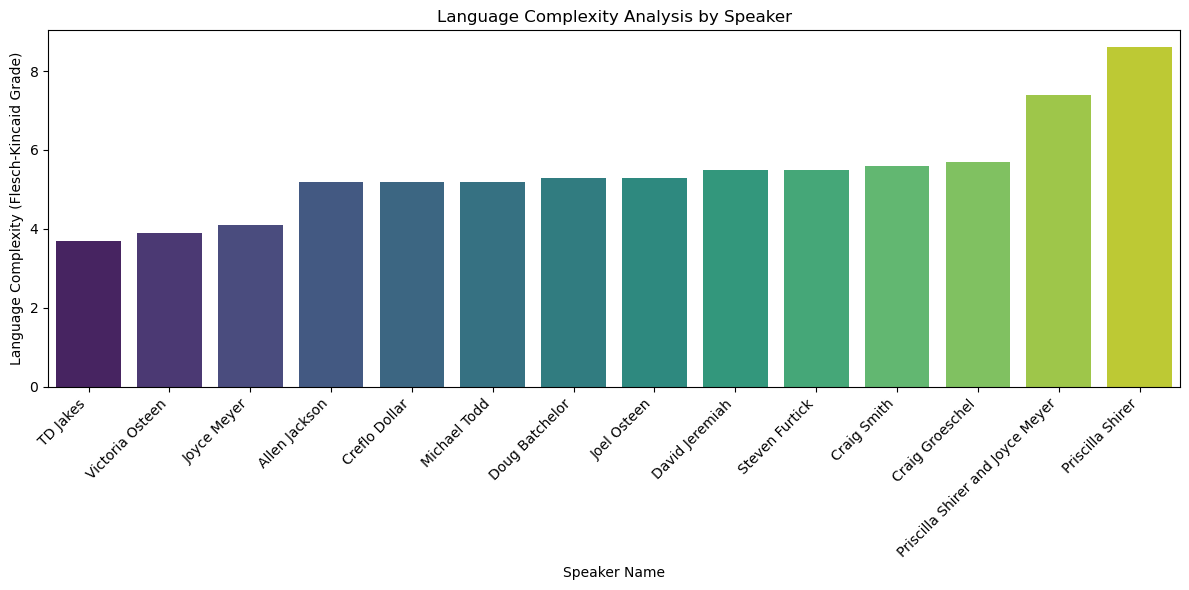

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Language Complexity' is already calculated in your 'grouped_data' DataFrame

# Sort the DataFrame by 'Language Complexity' in ascending order
grouped_data_sorted = grouped_data.sort_values(by='Language Complexity')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Speaker Name', y='Language Complexity', data=grouped_data_sorted, palette='viridis')
plt.title('Language Complexity Analysis by Speaker')
plt.xlabel('Speaker Name')
plt.ylabel('Language Complexity (Flesch-Kincaid Grade)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()